In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gpd
from sklearn.feature_selection import mutual_info_regression as mi_reg
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from pandas.plotting import parallel_coordinates
from scipy.stats import linregress

dhsData = pd.read_csv("./wrangled/DHS_data.csv", index_col = "DHS AREA")
lgaData = pd.read_csv("./wrangled/LGA_data.csv", index_col = "LGA")
depressionDHS = pd.read_csv("./wrangled/depression2018DHS.csv", index_col = "DHS AREA")
depressionLGA = pd.read_csv("./wrangled/depression.csv", index_col = "LGA")
std_scaler = StandardScaler()
vicLGA = gpd.read_file('./shapefiles/VIC_LGA_POLYGON_SHP.shp')
vicDHS = gpd.read_file('./shapefiles/VIC_DHS_POLYGON_SHP.shp')

<Figure size 2160x2160 with 0 Axes>

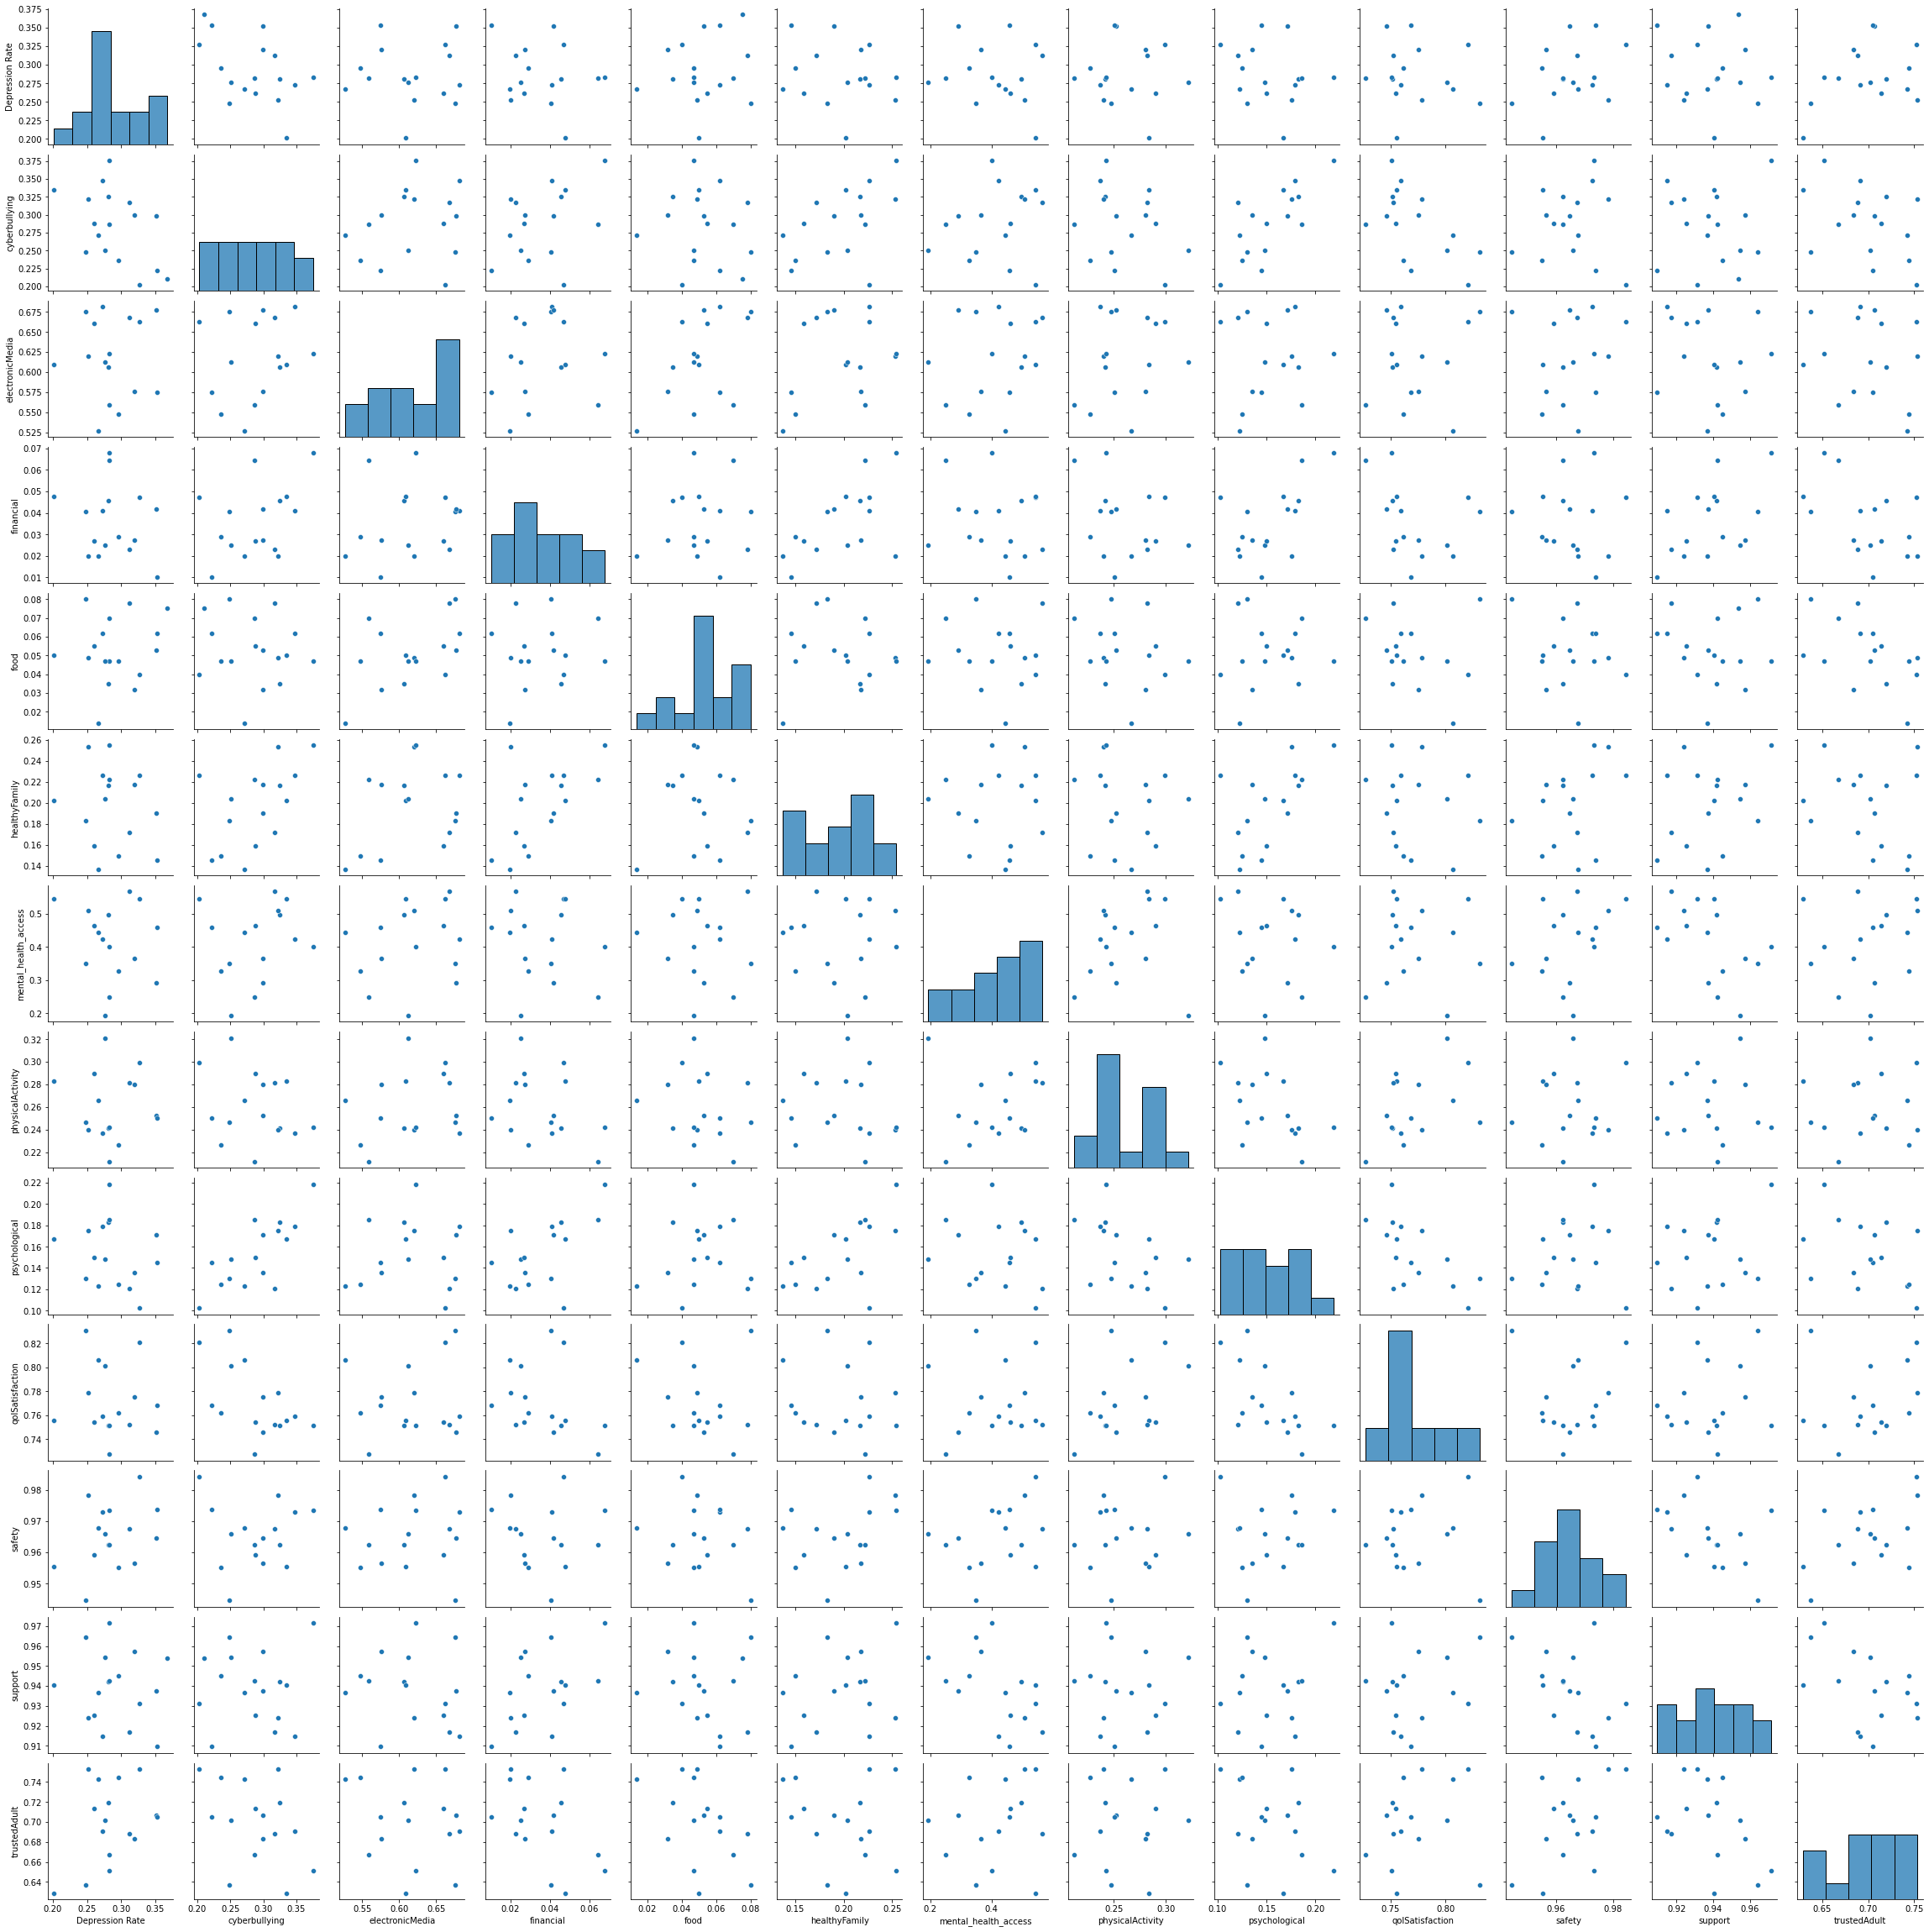

In [2]:
plt.figure(figsize = (30,30))
sns.pairplot(dhsData)

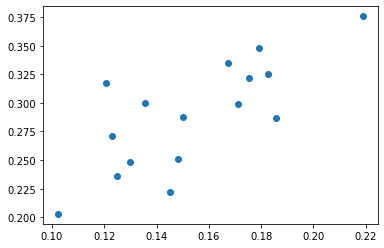

In [32]:
plt.scatter(dhsData['psychological'], dhsData['cyberbullying'])
plt.xlabel('Proportion of Young People with Psychological Stress')
plt.ylabel('Proporti')

<AxesSubplot:>

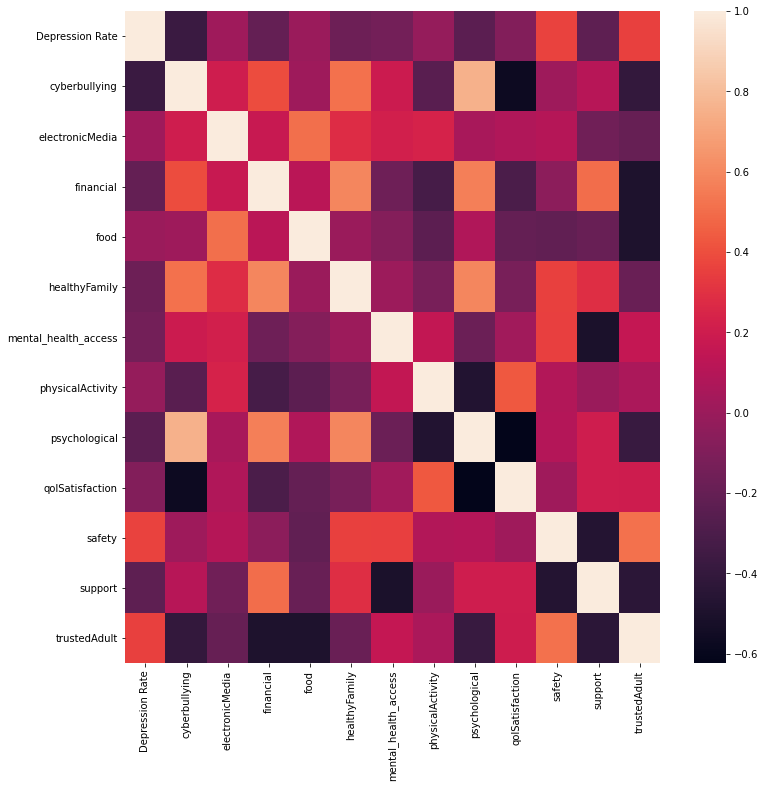

In [30]:
for_corr = dhsData.copy()
for_corr = for_corr.dropna()
cf = for_corr.corr(method='pearson')
plt.figure(figsize = (12,12))
sns.heatmap(cf)

<Figure size 1440x1440 with 0 Axes>

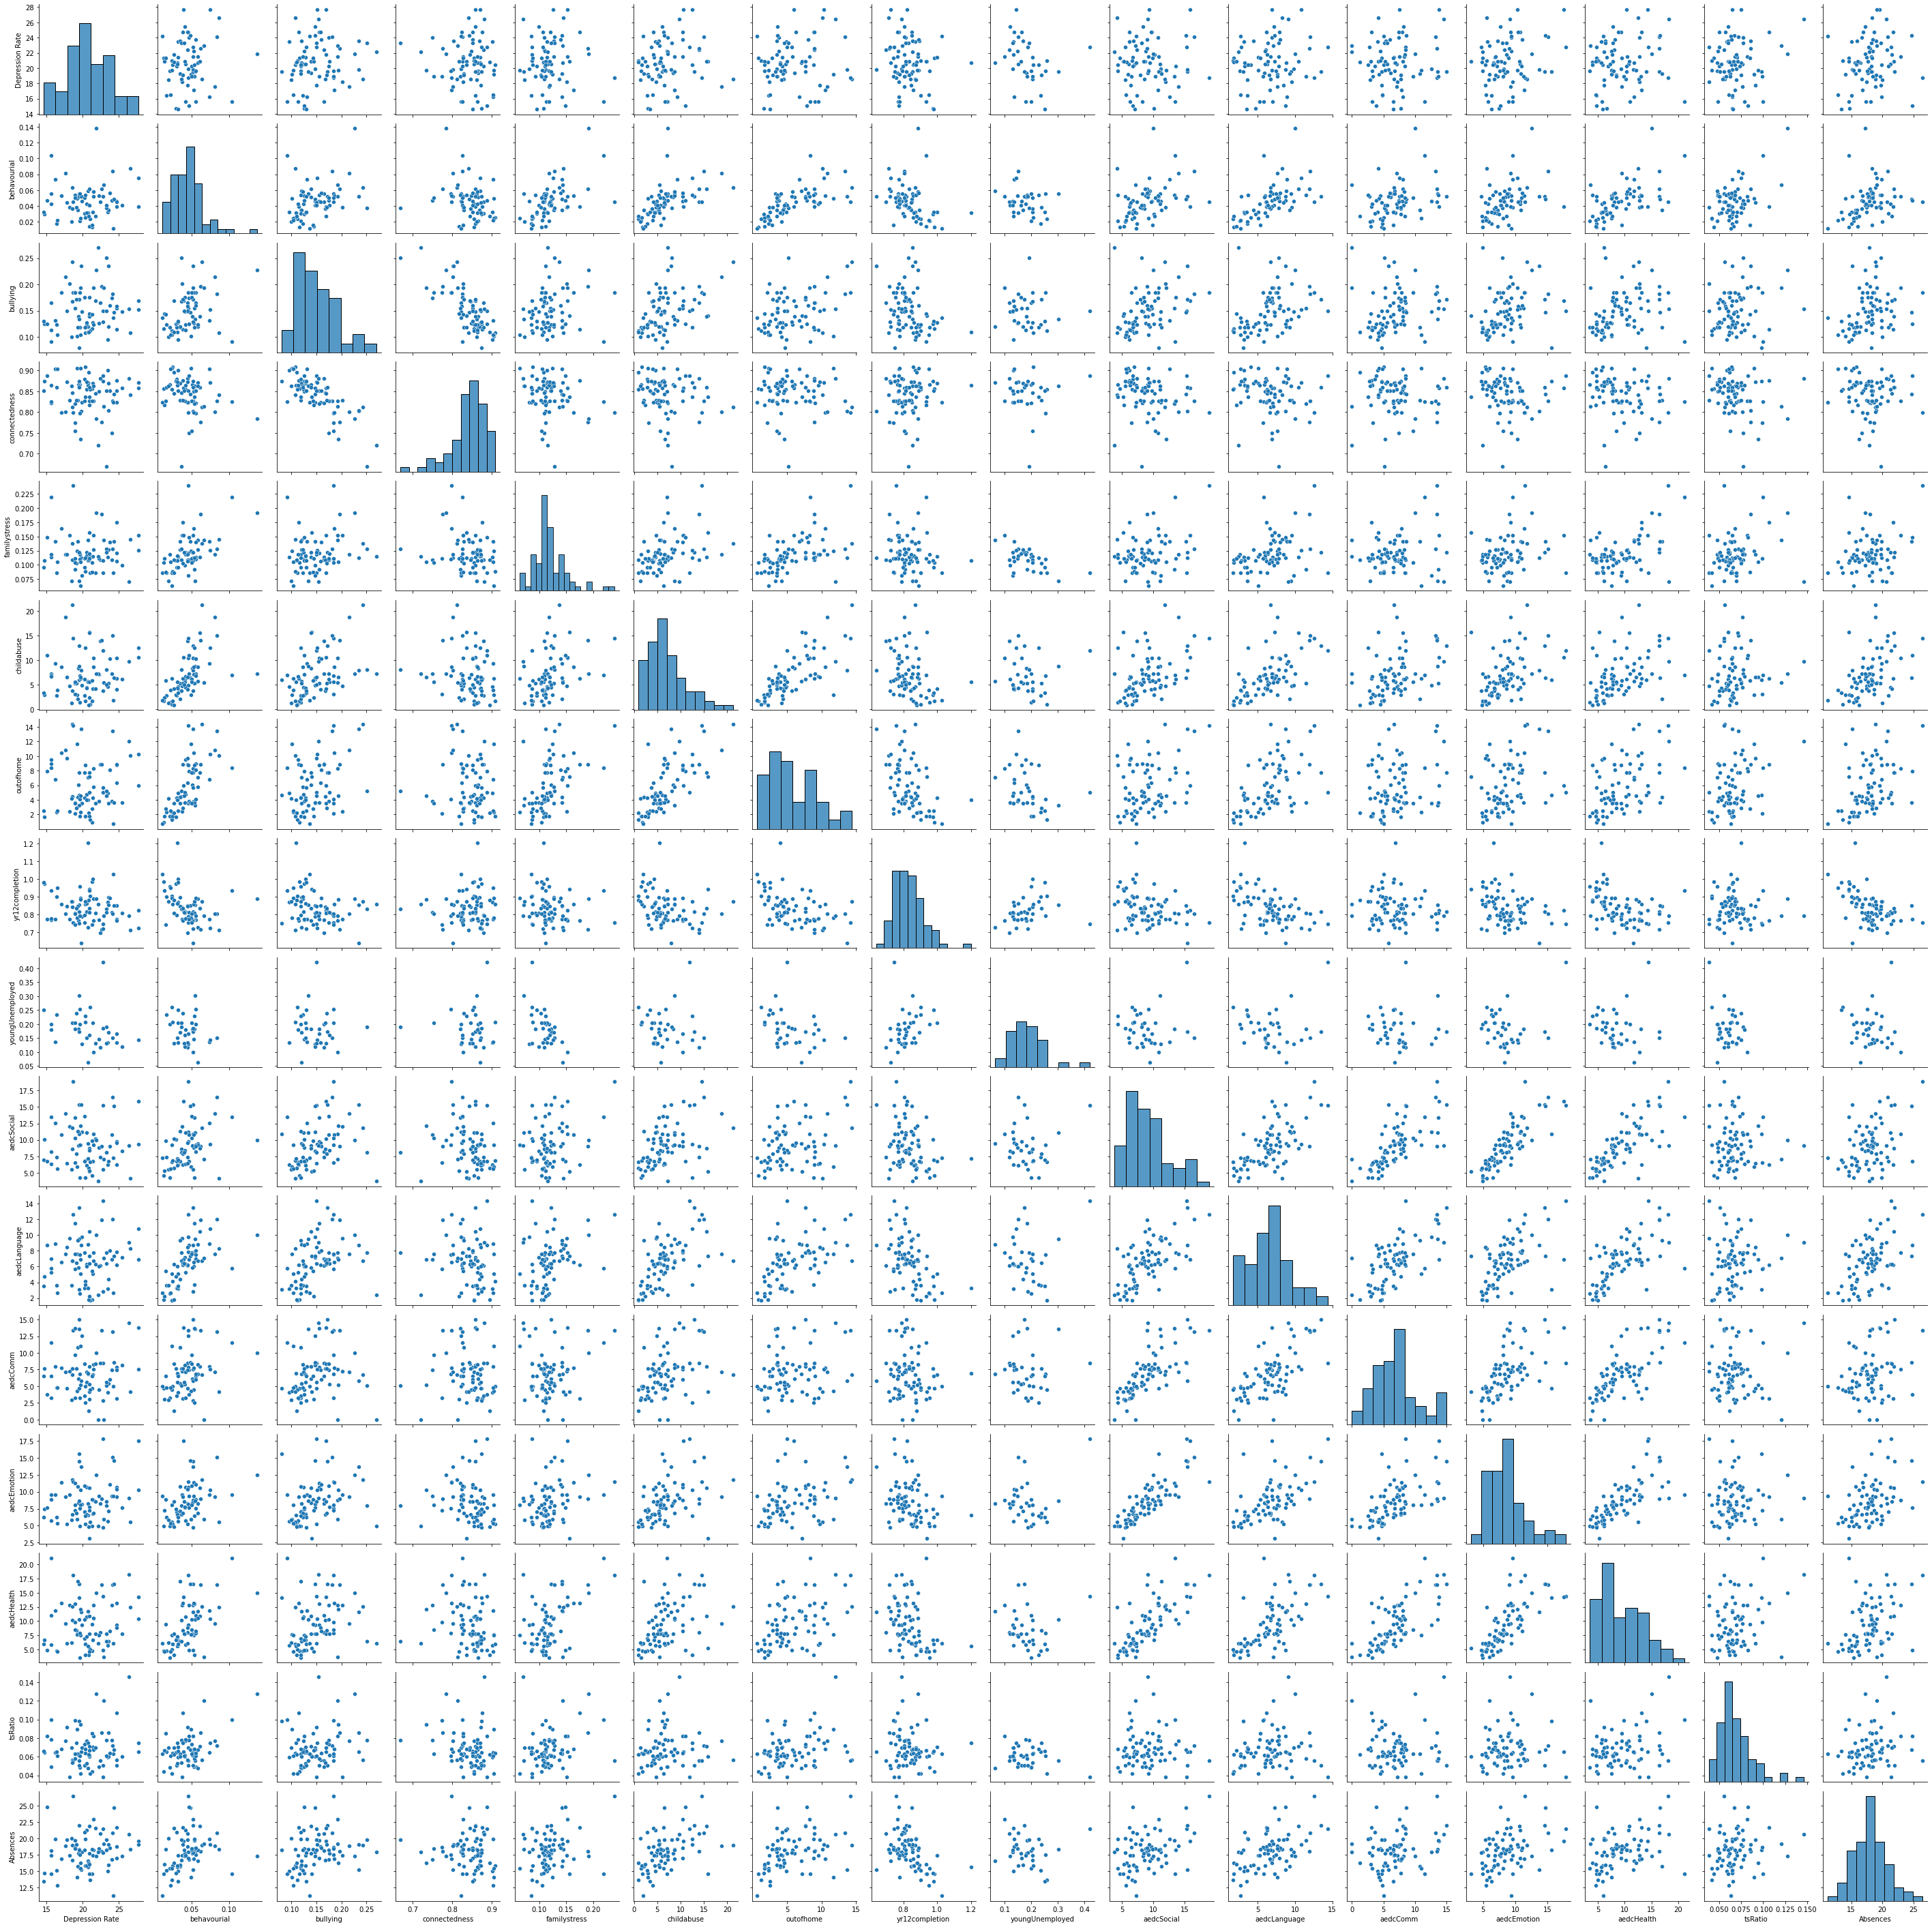

In [3]:
plt.figure(figsize = (20,20))
sns.pairplot(lgaData)

<Figure size 1440x1440 with 0 Axes>

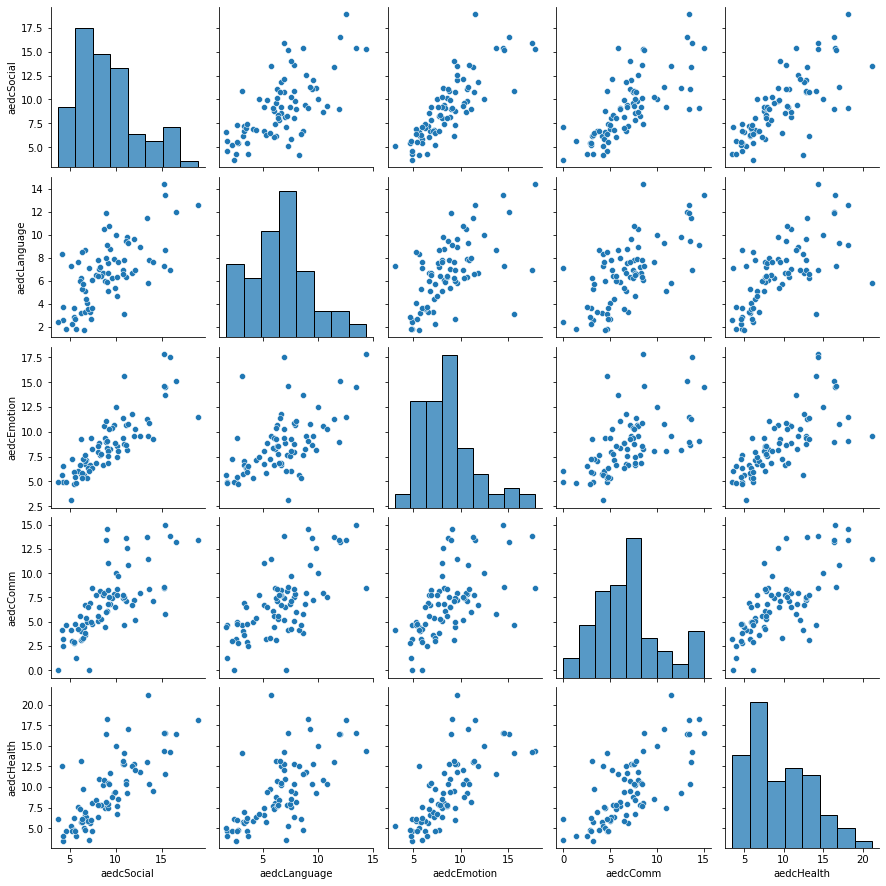

In [4]:
plt.figure(figsize = (20,20))
sns.pairplot(lgaData[['aedcSocial', 'aedcLanguage', 'aedcEmotion', 'aedcComm', 'aedcHealth']])

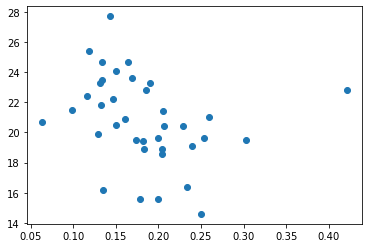

In [5]:
plt.scatter(lgaData['youngUnemployed'], lgaData['Depression Rate'])

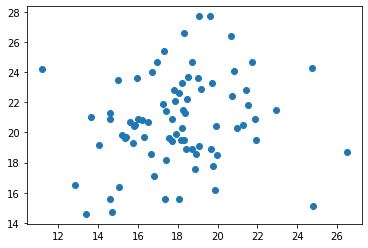

In [6]:
plt.scatter(lgaData['Absences'], lgaData['Depression Rate'])

In [8]:
lgaData.index = lgaData.index.str.upper()

<Figure size 1440x1440 with 0 Axes>

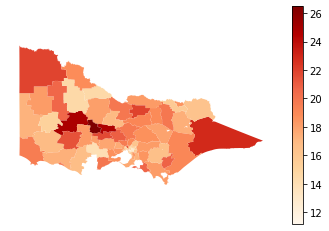

In [9]:
plottingLGA = vicLGA.merge(lgaData, left_on = 'ABB_NAME', right_on = 'LGA')
plt.figure(figsize = (20,20))
plottingLGA.plot(column = 'Absences', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

<Figure size 1440x1440 with 0 Axes>

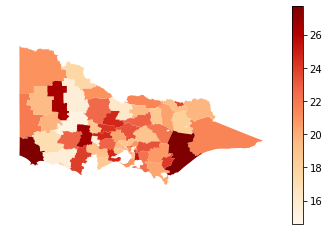

In [10]:
# ensure the merge goes well
depressionLGA.index = depressionLGA.index.str.upper()
plottingLGA = vicLGA.merge(depressionLGA, left_on = 'ABB_NAME', right_on = 'LGA')
plt.figure(figsize = (20,20))
plottingLGA.plot(column = 'Depression Rate', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [11]:
vicDHS

,OBJECTID,ServiceAre,ServiceA_1,Division,DivisionID,Shape__Are,Shape__Len,geometry
0,1,Wimmera South West,41,West Division,4,5.683410e+10,1.791899e+06,"POLYGON ((142.36858 -35.29531, 142.37416 -35.2..."
1,2,Central Highlands,42,West Division,4,1.466775e+10,9.661820e+05,"POLYGON ((143.21348 -36.90115, 143.21257 -36.9..."
2,3,Barwon,43,West Division,4,6.285218e+09,7.192523e+05,"POLYGON ((144.40670 -37.80457, 144.40646 -37.8..."
3,4,Western Melbourne,44,West Division,4,7.184475e+08,1.967089e+05,"POLYGON ((144.90311 -37.71703, 144.90316 -37.7..."
4,5,Brimbank Melton,45,West Division,4,6.511187e+08,1.377210e+05,"POLYGON ((144.57295 -37.55383, 144.57312 -37.5..."
5,6,Mallee,21,North Division,2,3.996175e+10,1.840435e+06,"POLYGON ((140.96477 -33.98181, 140.96540 -33.9..."
6,7,Loddon,22,North Division,2,1.902175e+10,1.106916e+06,"POLYGON ((144.38291 -35.88519, 144.38391 -35.8..."
7,8,Hume Moreland,23,North Division,2,5.542677e+08,1.532406e+05,"POLYGON ((144.71049 -37.48210, 144.71063 -37.4..."
8,9,North Eastern Melbourne,24,North Division,2,1.057462e+09,2.327048e+05,"POLYGON ((145.11555 -37.40927, 145.11528 -37.4..."
9,10,Bayside Peninsula,31,South Division,3,1.070851e+09,3.434342e+05,"POLYGON ((144.93850 -37.82589, 144.93865 -37.8..."


<Figure size 1440x1440 with 0 Axes>

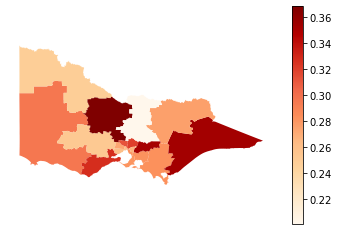

In [12]:
plottingDHS = vicDHS.merge(dhsData[['Depression Rate']], left_on = 'ServiceAre', right_on = 'DHS AREA')
plt.figure(figsize = (20,20))
plottingDHS.plot(column = 'Depression Rate', legend=True,cmap='OrRd')
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [13]:
dhsData

,Depression Rate,cyberbullying,electronicMedia,financial,food,healthyFamily,mental_health_access,physicalActivity,psychological,qolSatisfaction,safety,support,trustedAdult
DHS AREA,,,,,,,,,,,,,
Barwon,0.327,0.202918,0.662477,0.047090,0.040,0.226040,0.545123,0.299056,0.102357,0.820620,0.984284,0.931223,0.752718
Bayside Peninsula,0.281,0.325260,0.606603,0.045726,0.035,0.216705,0.497173,0.241793,0.182665,0.751246,0.962529,0.941928,0.719443
Brimbank Melton,0.273,0.348025,0.681328,0.040905,0.062,0.226621,0.424123,0.236756,0.179158,0.759165,0.972838,0.914720,0.691139
Central Highlands,0.252,0.321665,0.620008,0.020097,0.049,0.253368,0.508531,0.240216,0.175436,0.778527,0.978258,0.923932,0.753017
Goulburn,0.201,0.334897,0.609299,0.047842,0.050,0.202554,0.544758,0.283232,0.167415,0.755530,0.955496,0.940423,0.629006
Hume Moreland,0.312,0.317701,0.668218,0.022939,0.078,0.171860,0.566384,0.281743,0.120722,0.752220,0.967533,0.916924,0.688183
Inner Eastern Melbourne,0.267,0.271327,0.527122,0.019938,0.014,0.136813,0.444122,0.266293,0.122815,0.806411,0.967877,0.936543,0.742721
Inner Gippsland,0.283,0.375792,0.622677,0.067882,0.047,0.254668,0.400412,0.242577,0.218755,0.751136,0.973410,0.971628,0.651342
Loddon,0.368,0.210721,NaN,NaN,0.075,NaN,NaN,NaN,NaN,NaN,NaN,0.953934,NaN


In [14]:
for_MI = dhsData.dropna()
indep_var = ['Depression Rate']
dep_vars = for_MI.columns.difference(indep_var).to_list()
mi = [(var, float(mi_reg(for_MI[indep_var], for_MI[var]))) for var in dep_vars]
pd.DataFrame(mi, columns = ['factor', 'MI'])


,factor,MI
0,cyberbullying,0.000000
1,electronicMedia,0.000000
2,financial,0.000000
3,food,0.000000
4,healthyFamily,0.000000
5,mental_health_access,0.000000
6,physicalActivity,0.000000
7,psychological,0.017952
8,qolSatisfaction,0.000000
9,safety,0.002552


In [15]:
normalized_LGA=(lgaData-lgaData.min())/(lgaData.max()-lgaData.min())

In [16]:
normalized_LGA['bins'] = pd.cut(normalized_LGA['Depression Rate'], 3, labels=["low", "medium", "high"])

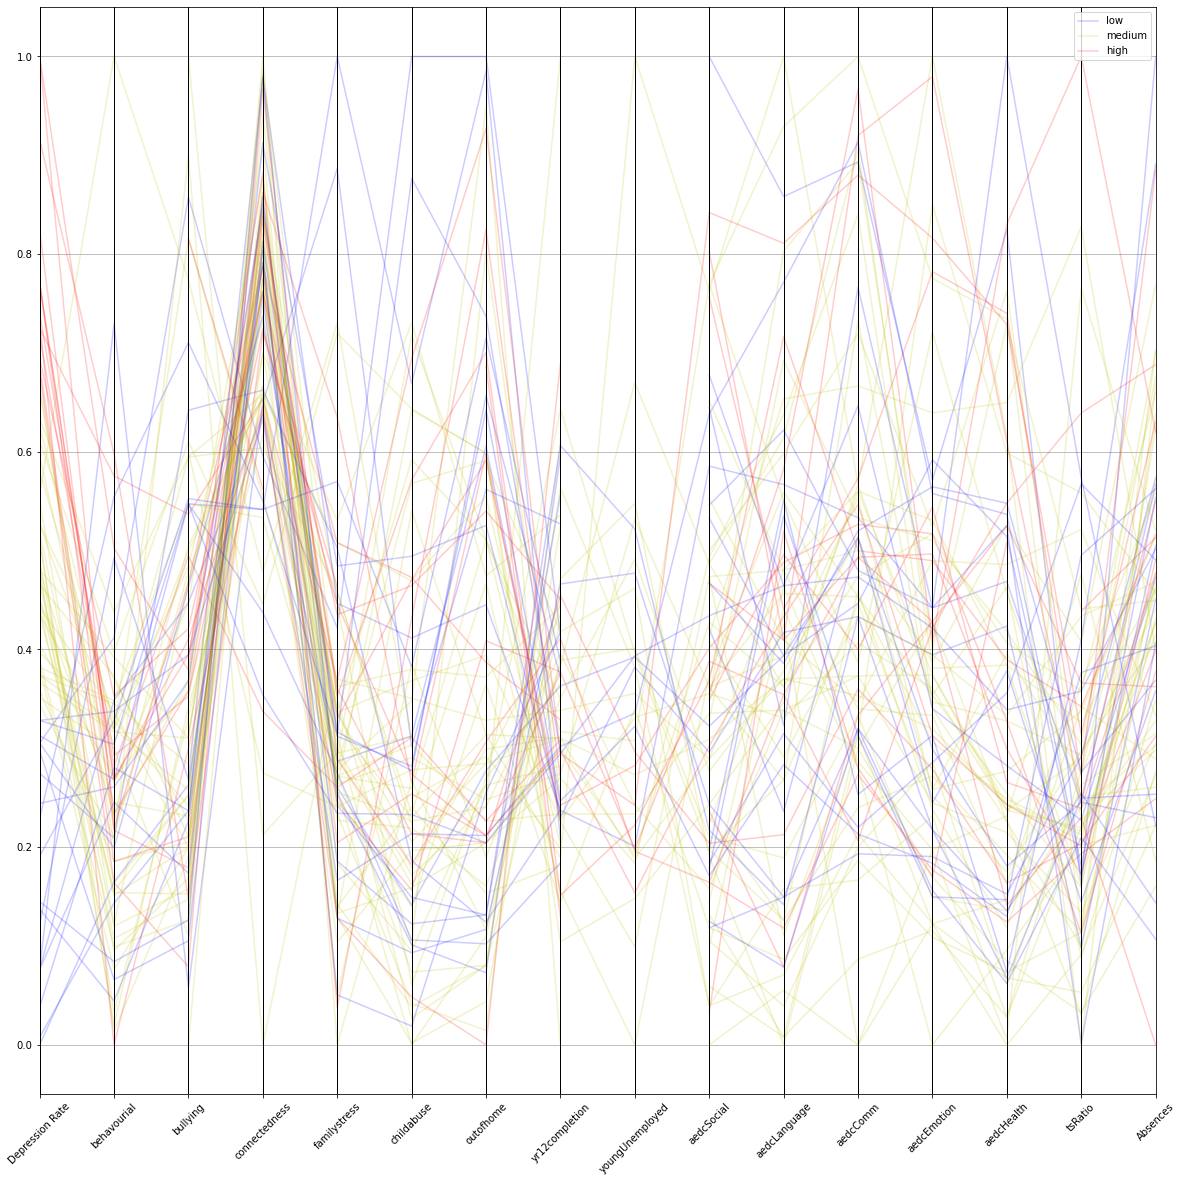

In [17]:
plt.figure(figsize=(20,20))
parallel_coordinates(normalized_LGA, 'bins',
                     alpha=0.2, color=["b","y",'r'])
plt.xticks(rotation=45)
plt.show()

In [18]:
normalized_DHS=(dhsData-dhsData.min())/(dhsData.max()-dhsData.min())

In [19]:
normalized_DHS['bins'] = pd.cut(normalized_DHS['Depression Rate'], 3, labels=["low", "medium", "high"])

AttributeError: module 'matplotlib.pyplot' has no attribute 'xsticks'

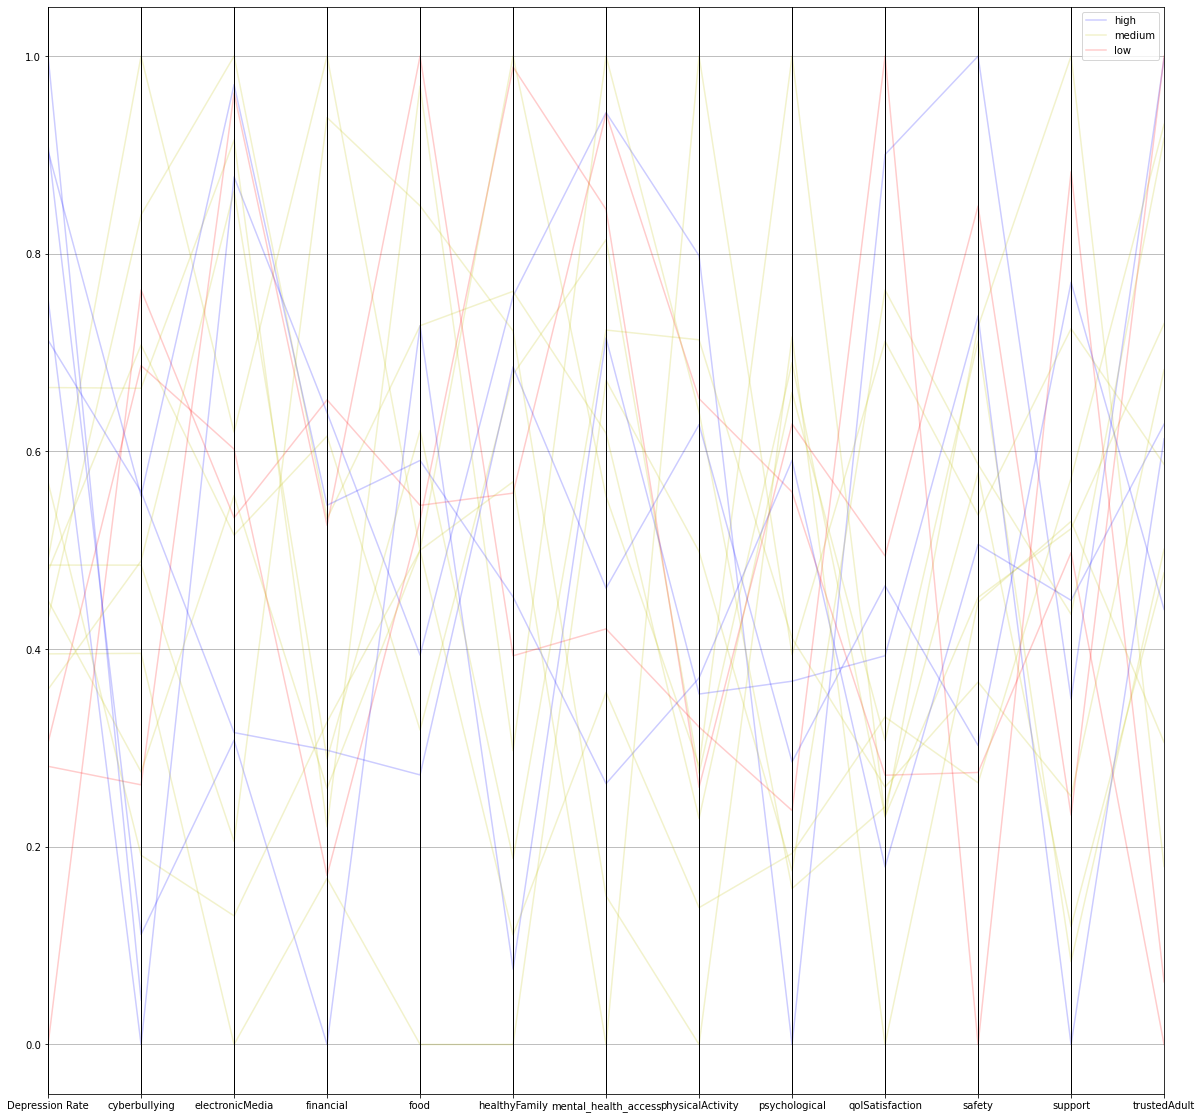

In [20]:
plt.figure(figsize=(20,20))
parallel_coordinates(normalized_DHS, 'bins',
                     alpha=0.2, color=["b","y",'r'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
df = pd.read_csv('./wrangled/LGA_data.csv', index_col = 'LGA')
df = df.dropna()

cf = df.corr(method='pearson')

In [ ]:
cf

In [ ]:
sns.heatmap(cf)

In [ ]:
lgaDropNa = lgaData.dropna()
miDf = pd.DataFrame()
miDf = pd.DataFrame(columns = lgaData.columns)

for var0 in lgaData.columns:
    mi_list = [float(mi_reg(lgaDropNa[[var0]], lgaDropNa[var])) for var in lgaData.columns]
    miDf[var0] = mi_list


In [ ]:
normalized_miDf=(miDf-miDf.min())/(miDf.max()-miDf.min())
sns.heatmap(normalized_miDf)

In [ ]:
cols = len(lgaData.axes[1])

i=0
for i in range(cols):
    if lgaData[:i] == lgaData['connectedness', 'yr12completion']
        df[1:, col + i] = df[:, i].rank()
    else:
        df[1:, col + i] = df[:, i].rank(ascending=False)

In [ ]:
ascColumns = ['connectedness', 'yr12completion']
lgaData.columns.difference(ascColumns)

In [ ]:
lgaData[['connectedness', 'yr12completion']].rank()

In [16]:
df = pd.read_csv("./wrangled/LGA_data.csv", index_col = "LGA")
rankDf = df.copy()
ascCols=['connectedness', 'yr12completion'] # higher the better cols
rankDf[ascCols] = df[ascCols].rank()
rankDf[df.columns.difference(ascCols)] = df[df.columns.difference(ascCols)].rank()

In [4]:
zScores = pd.DataFrame(std_scaler.fit_transform(lgaData), columns = lgaData.columns, index = lgaData.index)

In [5]:
zScores

,Depression Rate,behavourial,bullying,connectedness,familystress,childabuse,outofhome,yr12completion,youngUnemployed,aedcSocial,aedcLanguage,aedcComm,aedcEmotion,aedcHealth,tsRatio,Absences
LGA,,,,,,,,,,,,,,,,
Alpine,-0.866833,-0.376538,1.279926,-0.297449,1.024479,-0.552404,-1.025066,-0.710468,NaN,0.881602,1.030450,0.095139,0.309210,0.828588,-1.570964,-0.233181
Ararat,0.698031,NaN,-0.027043,1.071393,-1.102328,1.145751,-0.258331,-1.023728,3.755799,1.896925,2.725531,0.484133,3.082994,1.226004,-1.577968,1.239508
Ballarat,-1.751321,0.461126,0.349967,-0.434333,-0.205718,0.052007,0.921262,-0.762381,0.265934,-0.287556,0.112281,-0.114320,0.072424,0.381494,-1.033282,0.015977
Banyule,0.936162,-0.647573,-1.409414,1.367976,-0.196050,-0.570480,-0.287821,0.419940,-0.786564,-0.902903,-1.229658,-0.832463,-1.010029,-0.934947,-0.503537,-1.115985
Bass Coast,0.561956,-0.047280,0.349967,0.888881,-0.353628,1.632781,0.891772,-1.579045,-1.055808,-0.533695,-0.205547,0.484133,-0.130536,-0.363661,-0.691922,0.983537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,1.004200,0.485438,0.224297,0.250088,0.639334,0.781261,0.655853,0.674641,NaN,-0.041418,0.465423,-0.263933,0.816610,-0.313984,-0.248847,0.164666
Wyndham,-0.628701,0.192401,0.827514,-1.985688,-0.505947,-0.328254,-0.700678,-0.339933,0.330373,0.358558,0.324166,0.843204,-0.198189,-0.239469,-0.314796,0.138010
Yarra,0.187749,-1.434408,-0.202981,-0.320263,-1.044622,-0.292760,-0.907107,-1.076600,NaN,0.235488,-0.452746,-0.114320,0.072424,-0.015922,0.831032,0.112923


In [6]:
# higher is better
asec = ['yr12completion, connectedness']
# lower is better
desc = zScores.columns.difference(asec)

# for the features for which the lower the score, the better, we append a negative
zScores[desc] = -zScores[desc]

In [7]:
zScores

,Depression Rate,behavourial,bullying,connectedness,familystress,childabuse,outofhome,yr12completion,youngUnemployed,aedcSocial,aedcLanguage,aedcComm,aedcEmotion,aedcHealth,tsRatio,Absences
LGA,,,,,,,,,,,,,,,,
Alpine,0.866833,0.376538,-1.279926,0.297449,-1.024479,0.552404,1.025066,0.710468,NaN,-0.881602,-1.030450,-0.095139,-0.309210,-0.828588,1.570964,0.233181
Ararat,-0.698031,NaN,0.027043,-1.071393,1.102328,-1.145751,0.258331,1.023728,-3.755799,-1.896925,-2.725531,-0.484133,-3.082994,-1.226004,1.577968,-1.239508
Ballarat,1.751321,-0.461126,-0.349967,0.434333,0.205718,-0.052007,-0.921262,0.762381,-0.265934,0.287556,-0.112281,0.114320,-0.072424,-0.381494,1.033282,-0.015977
Banyule,-0.936162,0.647573,1.409414,-1.367976,0.196050,0.570480,0.287821,-0.419940,0.786564,0.902903,1.229658,0.832463,1.010029,0.934947,0.503537,1.115985
Bass Coast,-0.561956,0.047280,-0.349967,-0.888881,0.353628,-1.632781,-0.891772,1.579045,1.055808,0.533695,0.205547,-0.484133,0.130536,0.363661,0.691922,-0.983537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,-1.004200,-0.485438,-0.224297,-0.250088,-0.639334,-0.781261,-0.655853,-0.674641,NaN,0.041418,-0.465423,0.263933,-0.816610,0.313984,0.248847,-0.164666
Wyndham,0.628701,-0.192401,-0.827514,1.985688,0.505947,0.328254,0.700678,0.339933,-0.330373,-0.358558,-0.324166,-0.843204,0.198189,0.239469,0.314796,-0.138010
Yarra,-0.187749,1.434408,0.202981,0.320263,1.044622,0.292760,0.907107,1.076600,NaN,-0.235488,0.452746,0.114320,-0.072424,0.015922,-0.831032,-0.112923


In [8]:
# not relevant
zScores = zScores.drop('tsRatio', axis=1)

In [9]:
zScores = zScores.fillna(0)

In [10]:
zScores

,Depression Rate,behavourial,bullying,connectedness,familystress,childabuse,outofhome,yr12completion,youngUnemployed,aedcSocial,aedcLanguage,aedcComm,aedcEmotion,aedcHealth,Absences
LGA,,,,,,,,,,,,,,,
Alpine,0.866833,0.376538,-1.279926,0.297449,-1.024479,0.552404,1.025066,0.710468,0.000000,-0.881602,-1.030450,-0.095139,-0.309210,-0.828588,0.233181
Ararat,-0.698031,0.000000,0.027043,-1.071393,1.102328,-1.145751,0.258331,1.023728,-3.755799,-1.896925,-2.725531,-0.484133,-3.082994,-1.226004,-1.239508
Ballarat,1.751321,-0.461126,-0.349967,0.434333,0.205718,-0.052007,-0.921262,0.762381,-0.265934,0.287556,-0.112281,0.114320,-0.072424,-0.381494,-0.015977
Banyule,-0.936162,0.647573,1.409414,-1.367976,0.196050,0.570480,0.287821,-0.419940,0.786564,0.902903,1.229658,0.832463,1.010029,0.934947,1.115985
Bass Coast,-0.561956,0.047280,-0.349967,-0.888881,0.353628,-1.632781,-0.891772,1.579045,1.055808,0.533695,0.205547,-0.484133,0.130536,0.363661,-0.983537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,-1.004200,-0.485438,-0.224297,-0.250088,-0.639334,-0.781261,-0.655853,-0.674641,0.000000,0.041418,-0.465423,0.263933,-0.816610,0.313984,-0.164666
Wyndham,0.628701,-0.192401,-0.827514,1.985688,0.505947,0.328254,0.700678,0.339933,-0.330373,-0.358558,-0.324166,-0.843204,0.198189,0.239469,-0.138010
Yarra,-0.187749,1.434408,0.202981,0.320263,1.044622,0.292760,0.907107,1.076600,0.000000,-0.235488,0.452746,0.114320,-0.072424,0.015922,-0.112923


In [11]:
zScores['overallZ'] = zScores.mean(axis=1)

In [12]:
zScores

,Depression Rate,behavourial,bullying,connectedness,familystress,childabuse,outofhome,yr12completion,youngUnemployed,aedcSocial,aedcLanguage,aedcComm,aedcEmotion,aedcHealth,Absences,overallZ
LGA,,,,,,,,,,,,,,,,
Alpine,0.866833,0.376538,-1.279926,0.297449,-1.024479,0.552404,1.025066,0.710468,0.000000,-0.881602,-1.030450,-0.095139,-0.309210,-0.828588,0.233181,-0.092497
Ararat,-0.698031,0.000000,0.027043,-1.071393,1.102328,-1.145751,0.258331,1.023728,-3.755799,-1.896925,-2.725531,-0.484133,-3.082994,-1.226004,-1.239508,-0.994309
Ballarat,1.751321,-0.461126,-0.349967,0.434333,0.205718,-0.052007,-0.921262,0.762381,-0.265934,0.287556,-0.112281,0.114320,-0.072424,-0.381494,-0.015977,0.061544
Banyule,-0.936162,0.647573,1.409414,-1.367976,0.196050,0.570480,0.287821,-0.419940,0.786564,0.902903,1.229658,0.832463,1.010029,0.934947,1.115985,0.479987
Bass Coast,-0.561956,0.047280,-0.349967,-0.888881,0.353628,-1.632781,-0.891772,1.579045,1.055808,0.533695,0.205547,-0.484133,0.130536,0.363661,-0.983537,-0.101588
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Wodonga,-1.004200,-0.485438,-0.224297,-0.250088,-0.639334,-0.781261,-0.655853,-0.674641,0.000000,0.041418,-0.465423,0.263933,-0.816610,0.313984,-0.164666,-0.369498
Wyndham,0.628701,-0.192401,-0.827514,1.985688,0.505947,0.328254,0.700678,0.339933,-0.330373,-0.358558,-0.324166,-0.843204,0.198189,0.239469,-0.138010,0.127509
Yarra,-0.187749,1.434408,0.202981,0.320263,1.044622,0.292760,0.907107,1.076600,0.000000,-0.235488,0.452746,0.114320,-0.072424,0.015922,-0.112923,0.350210


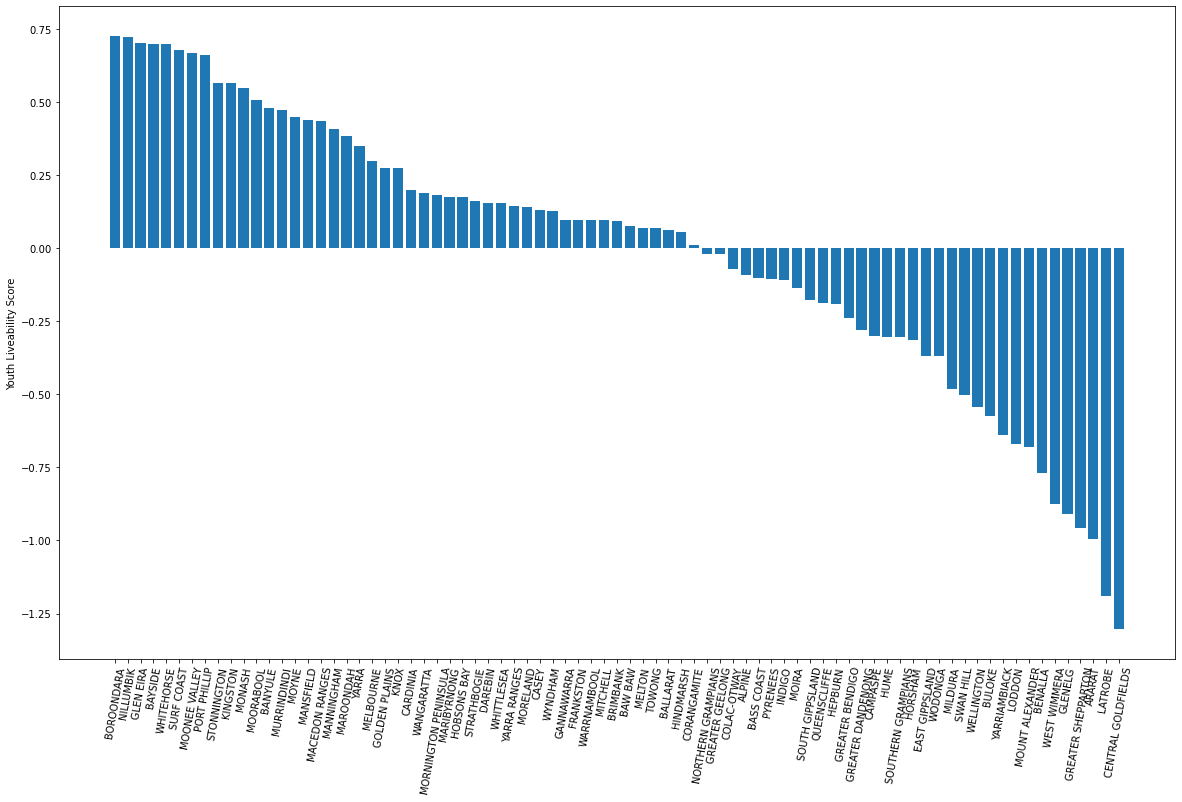

In [39]:
plt.figure(figsize=(20,12))
zScores = zScores.sort_values(by = 'overallZ', ascending=False)
plt.bar(zScores.index, zScores['overallZ'])
plt.xticks(np.arange(len(zScores.index)), zScores.index, rotation = 80)
plt.ylabel("Youth Liveability Score")
plt.show()

<Figure size 1440x1440 with 0 Axes>

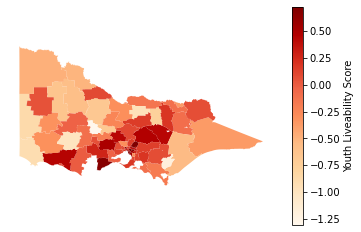

In [15]:
zScores.index = zScores.index.str.upper()
plottingLGA = vicLGA.merge(zScores, left_on = 'ABB_NAME', right_on = 'LGA')
plt.figure(figsize = (20,20))
plottingLGA.plot(column = 'overallZ', legend=True,cmap='OrRd', legend_kwds={'label': "Youth Liveability Score"})
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [7]:
zScoresAEDC= pd.DataFrame(std_scaler.fit_transform(lgaData), columns = lgaData.columns, index = lgaData.index)

In [8]:
zScoresAEDC = zScoresAEDC.drop(['aedcSocial', 'aedcLanguage', 'aedcComm', 'aedcEmotion', 'tsRatio'], axis =1)

In [10]:
# higher is better
asec = ['yr12completion, connectedness']
# lower is better
desc = zScoresAEDC.columns.difference(asec)

# for the features for which the lower the score, the better, we append a negative
zScoresAEDC[desc] = -zScoresAEDC[desc]
zScoresAEDC = zScoresAEDC.fillna(0)
zScoresAEDC['overallZ'] = zScoresAEDC.mean(axis=1)

In [12]:
zScoresAEDC.index = zScoresAEDC.index.str.upper()

<Figure size 1440x1440 with 0 Axes>

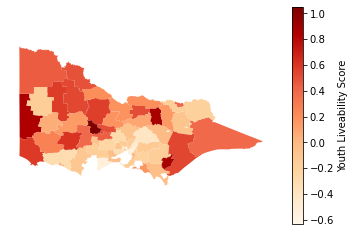

In [15]:
plottingLGA = vicLGA.merge(zScoresAEDC, left_on = 'ABB_NAME', right_on = 'LGA')
plt.figure(figsize = (20,20))
plottingLGA.plot(column = 'overallZ', legend=True,cmap='OrRd', legend_kwds={'label': "Youth Liveability Score"})
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [28]:
model = linregress(zScores['overallZ'], df['Depression Rate'])

In [29]:
model

LinregressResult(slope=-1.4855384944818018, intercept=20.748101265822786, rvalue=-0.23958605863490456, pvalue=0.033451388784361984, stderr=0.6860256930954726)

In [18]:
plottingLGA.head()

,LG_PLY_PID,DT_CREATE,DT_RETIRE,LGA_PID,LGA_NAME,ABB_NAME,DT_GAZETD,STATE_PID,geometry,Depression Rate,...,outofhome,yr12completion,youngUnemployed,aedcSocial,aedcLanguage,aedcComm,aedcEmotion,aedcHealth,Absences,overallZ
0,484,2017-09-08,None,VIC230,GOLDEN PLAINS SHIRE,GOLDEN PLAINS,None,2,"POLYGON ((144.08423 -38.11006, 144.08378 -38.1...",0.526645,...,-1.717487,0.631570,0.000000,0.995205,-0.324166,0.772617,0.908549,0.463016,1.467483,0.276344
1,491,2017-09-08,None,VIC190,MOIRA SHIRE,MOIRA,None,2,"POLYGON ((146.21053 -36.11529, 146.21009 -36.1...",-0.255787,...,0.022412,-0.629604,0.000000,-0.020117,-0.006338,-0.424287,0.604109,-0.257302,-0.076734,-0.135084
2,502,2017-09-08,None,VIC205,DAREBIN CITY,DAREBIN,None,2,"POLYGON ((144.98381 -37.76403, 144.98367 -37.7...",-0.221768,...,0.464759,-1.931793,-0.346896,0.749066,0.558689,0.054475,0.637936,0.711401,0.226107,0.154395
3,504,2017-09-08,None,VIC207,MAROONDAH CITY,MAROONDAH,None,2,"POLYGON ((145.28727 -37.83333, 145.28727 -37.8...",0.084401,...,0.553229,-0.320563,0.523440,0.933670,0.240861,0.383623,0.671762,0.537531,0.803743,0.382593
4,522,2017-09-08,None,VIC232,WEST WIMMERA SHIRE,WEST WIMMERA,None,2,"POLYGON ((141.49122 -37.22363, 141.49185 -37.2...",-0.391862,...,0.000000,-0.624531,0.000000,-0.266256,-1.171707,-0.932972,-1.290183,-1.375035,0.279458,-0.874254


In [67]:
np.random.seed(111111111)
kmeans = KMeans(n_clusters = 3)
clusters = kmeans.fit(np.array(plottingLGA['overallZ']).reshape(-1,1)).labels_
clusterdict = {1: "Low Scoring", 0: "Average Scoring", 2: "High Scoring"}
clusterLabeled = [clusterdict[i] for i in clusters]
plottingLGA['clusters'] = clusterLabeled
plottingLGA.plot(column = 'clusters',categorical=True,legend=True,cmap='viridis', legend_kwds={'frameon': False})
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

KeyError: 3

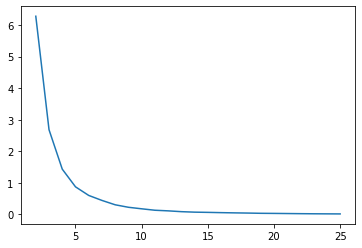

In [70]:
ssd = []
for i in range(2, 26):
    km = KMeans(n_clusters=i)
    km.fit_predict(np.array(plottingLGA['overallZ']).reshape(-1,1))
    ssd.append(km.inertia_)
    
plt.plot(range(2,26), ssd)

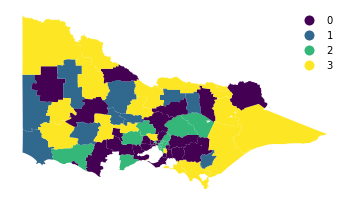

In [78]:
np.random.seed(111111111)
kmeans = KMeans(n_clusters = 4)
clusters = kmeans.fit(np.array(plottingLGA['overallZ']).reshape(-1,1)).labels_
plottingLGA['clusters'] = clusters
plottingLGA.plot(column = 'clusters',categorical=True,legend=True,cmap='viridis', legend_kwds={'frameon': False})
# removes tick marks
plt.xticks([])
plt.yticks([])
plt.box(False)

In [79]:
clusters = kmeans.fit(np.array(plottingLGA['overallZ']).reshape(-1,1))

In [80]:
clusters.cluster_centers_

array([[ 0.12734801],
       [-0.89882929],
       [ 0.55445712],
       [-0.26734086]])

In [81]:
clusters.labels_

array([0, 3, 0, 2, 1, 2, 2, 0, 2, 2, 2, 2, 3, 3, 3, 0, 3, 0, 0, 0, 2, 2,
       0, 1, 0, 0, 3, 3, 2, 3, 0, 0, 3, 3, 2, 2, 1, 1, 2, 0, 2, 2, 0, 1,
       0, 3, 1, 1, 3, 0, 0, 1, 0, 2, 0, 0, 3, 2, 0, 1, 3, 3, 0, 0, 0, 3,
       2, 2, 3, 0, 3, 2, 3, 3, 3, 0, 0, 1, 3, 0, 2])